In [1]:
import pandas as pd
from helpers import check_duplicates, check_empty

%matplotlib inline

In [2]:
# read the datasets
train_set = pd.read_csv('Datasets/train.txt', sep=';', names = ['text', 'label'])
test_set = pd.read_csv('Datasets/test.txt', sep=';', names = ['text', 'label'])
val_set = pd.read_csv('Datasets/val.txt', sep=';', names = ['text', 'label'])

In [3]:
# show first 5 trainig samples
train_set.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
# show first 5 testing samples
test_set.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [5]:
# show first 5 validation samples
val_set.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [6]:
# check if the training data is balanced 
train_set.label.value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: label, dtype: int64

In [7]:
# check if the training data is balanced 
test_set.label.value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: label, dtype: int64

In [8]:
val_set.label.value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: label, dtype: int64

================= 

**Note:**
the dataset is imbalanced and it's not equally splitted. So, before dealing with imbalanced data I will concatenate the 3 datasets and do the preprocessing then I will split it again.

In [9]:
# concatenate the datasets
df = pd.concat([train_set, test_set, val_set])

In [10]:
df.describe()

,text,label
count,20000,20000
unique,19948,6
top,i feel pretty weird blogging about deodorant b...,joy
freq,2,6761


In [11]:
# check duplicates and null values
print("Are there duplicated rows?", check_duplicates(df))
print("Are there missing values?",check_empty(df))

Are there duplicated rows? True
Are there missing values? False


In [12]:
# remove duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
# imbalancing check
df.label.value_counts()

joy         6760
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: label, dtype: int64

======================

### Dealing with imbalanced Data

to solve this problem we may use 
1. sampling, under sampling by selecting only the least number of records for each label. 
2. collecting more data, and that what I will try to do by finding another datasets and merging the two then I will use under sampling if it is needed.


### tweet emotions Data

In [14]:
# read additional dataset 
dataset = pd.read_csv('Datasets/tweet_emotions.csv')

In [15]:
# show first 5 rows
dataset.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [16]:
# remove tweet_id column
dataset.drop(columns=['tweet_id'], inplace=True)
# check duplicates
print("Is there a duplicate observation? ", check_duplicates(dataset))
print("Is there a missing value? ", check_empty(dataset))

Is there a duplicate observation?  True
Is there a missing value?  False


In [17]:
dataset.drop_duplicates(inplace=True, ignore_index=True)

In [18]:
# No of observations for targeted emotions [anger, sadness, happiness, neutral] 
dataset.sentiment.value_counts()

neutral       8617
worry         8452
happiness     5194
sadness       5160
love          3801
surprise      2187
fun           1776
relief        1524
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [19]:
# select the indices of each target label
target_labels = {'neutral', 'happiness', 'sadness', 'anger'}
indices = []
for label in target_labels:
    indices += dataset[dataset.sentiment == label].index.to_list()
# select the dataset
dataset = dataset.iloc[indices]

In [20]:
# check labels
dataset.sentiment.unique()

array(['happiness', 'anger', 'neutral', 'sadness'], dtype=object)

In [21]:
# rename the columns
dataset.rename(columns= {'content': 'text', "sentiment": "label"}, inplace=True)

In [22]:
# display
dataset.head()

,label,text
40,happiness,mmm much better day... so far! it's still quit...
69,happiness,So great to see Oin &amp; Cynthia. So happy. ...
77,happiness,"@havingmysay dude, that is my favorite sandwi..."
126,happiness,Need to pack for CALI CALI! Cannot waittt! Thi...
233,happiness,took a math test today. The day before the tes...


In [23]:
# check duplicates
print("Is there a duplicate observation? ", check_duplicates(dataset))
print("Is there a missing value? ", check_empty(dataset))

Is there a duplicate observation?  False
Is there a missing value?  False


### goEmotion data

In [24]:
# read customized goEmotions
data = pd.read_csv('Datasets/MgoEmotions.csv', index_col= 0)
data.head()

,text,label
0,That game hurt.,sadness
2,"You do right, if you don't care then fuck 'em!",neutral
4,"[NAME] was nowhere near them, he was by the Fa...",neutral
10,"I have, and now that you mention it, I think t...",neutral
12,BUT IT'S HER TURN! /s,neutral


In [25]:
# concatinate the datasets
df = pd.concat([df, dataset, data], ignore_index = True)

In [26]:
# check duplicates
print("Is there any duplicated rows?", check_duplicates(df))
# check missing values
print("Is there any missing values?", check_empty(df))

Is there any duplicated rows? False
Is there any missing values? False


In [27]:
# count values
df.label.value_counts()

neutral      40063
sadness      15502
joy          12394
anger         8360
happiness     5194
fear          2373
love          1641
surprise       719
Name: label, dtype: int64

In [28]:
# select only the target labels
df = df[(df.label != 'fear') & (df.label != 'love') & (df.label != 'surprise')]
# check after
df.label.value_counts()

neutral      40063
sadness      15502
joy          12394
anger         8360
happiness     5194
Name: label, dtype: int64

In [29]:
# replace joy to happiness
df.replace(to_replace='joy', value='happiness', inplace= True)

In [30]:
# check labels again
df.label.value_counts()

neutral      40063
happiness    17588
sadness      15502
anger         8360
Name: label, dtype: int64

In [31]:
# check duplicates
print("Is there any duplicated rows?", check_duplicates(df))
# check missing values
print("Is there any missing values?", check_empty(df))

Is there any duplicated rows? False
Is there any missing values? False


## Data Cleaning

In [32]:
from helpers import clean_text
# clean the text
df['text'] = df.text.apply(clean_text)

In [33]:
# check duplicates
print("Is there any duplicated rows?", check_duplicates(df))
# check missing values
print("Is there any missing values?", check_empty(df))

Is there any duplicated rows? True
Is there any missing values? False


In [34]:
# remove the duplicates after cleaning
df.drop_duplicates(inplace= True, ignore_index= True)

In [35]:
# check duplicates
print("Is there any duplicated rows?", check_duplicates(df))
# check missing values
print("Is there any missing values?", check_empty(df))

Is there any duplicated rows? False
Is there any missing values? False


In [36]:
# show after cleaning 
df.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am feeling grouchy,anger
4,ive been feeling a little burdened lately wasn...,sadness


In [37]:
df.label.value_counts()

neutral      39930
happiness    17539
sadness      15490
anger         8350
Name: label, dtype: int64

********** 
Now I will use under sampling

In [38]:
# check duplicates
print("Is there any duplicated rows?", check_duplicates(df))
# check missing values
print("Is there any missing values?", check_empty(df))

Is there any duplicated rows? False
Is there any missing values? False


In [39]:
#using undersampling 
import numpy as np

# Store anger records
anger_records = df[df.label == 'anger'].label.count()

# Picking the indices of all labels
label_dict = {
    l : df[df.label == l].index for l in df.label.unique()
 }


In [40]:
# Out of the indices we picked, randomly select number of dialects records = number of anger label records 
for label, indices in label_dict.items():
    label_dict[label] = np.random.choice(indices, anger_records, replace = False)
    label_dict[label] = np.array(label_dict[label])

under_sample_indices = np.concatenate(list(label_dict.values()))

<AxesSubplot:>

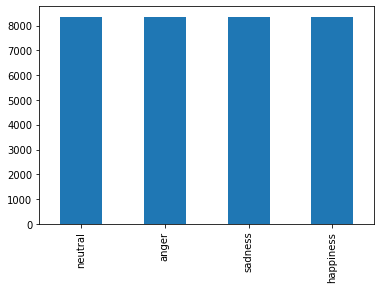

In [41]:
# Copy under sample dataset  
sampled_data = df.iloc[under_sample_indices,:]
sampled_data.label.value_counts().plot(kind = 'bar')

In [42]:
# check duplicates
print("Is there any duplicated rows?", check_duplicates(sampled_data))
# check missing values
print("Is there any missing values?", check_empty(sampled_data))

Is there any duplicated rows? False
Is there any missing values? False


In [44]:
sampled_data.reset_index(drop=True, inplace=True)
sampled_data.to_csv('Datasets/txtEmotion.csv')